# Time Series forecasting fundamentals with TensorFlow + Milestine Project3

Let's write some TensorFlow code to predict the price of BitCoin on the historical price of BitCoin.

## Get Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-11-11 11:56:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2021-11-11 11:56:38 (49.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time Series data 

In [ ]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"]) # Parse the data column and tell pandas tell pandas column 1 is a date column

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

> We've collected the historical data price of bitcoin for the past `8 years but there is 2787 samples.

>Typically Deep Learning models usually like lots and lots and lots of data saples( where lots of lost and lots can be thousands to tens of thousands to million).

>A similar number of samples is something you'll of ten run into with time series data problems. 

> **Note:** The **seasonality** of Time Series dataset is refered as the number of samples per year. So for our Bitcoin data, it has a seosanlity of daily or value of 365 because we collect one sample per day meaning we'll get 365 smaples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices=pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


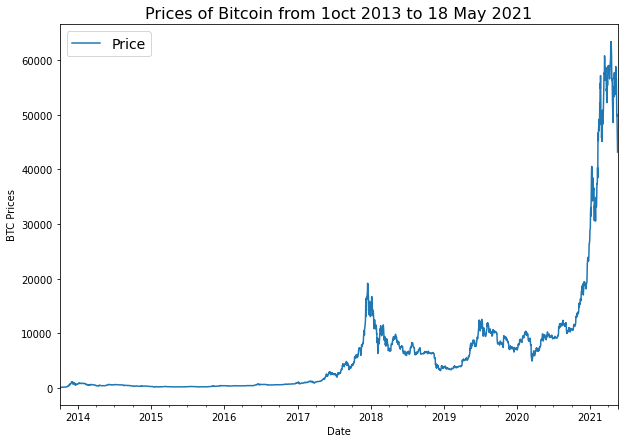

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))

plt.ylabel("BTC Prices")
plt.title("Prices of Bitcoin from 1oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module


In [ ]:
# Importing and formating historical bitcoin data with Python
import csv 
from datetime import datetime

timesteps=[]
btc_price=[]

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader) # Skips first line (this gets rid of the column titles)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the dates as dates(not string)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10]

[datetime.datetime(2013, 10, 1, 0, 0),
 datetime.datetime(2013, 10, 2, 0, 0),
 datetime.datetime(2013, 10, 3, 0, 0),
 datetime.datetime(2013, 10, 4, 0, 0),
 datetime.datetime(2013, 10, 5, 0, 0),
 datetime.datetime(2013, 10, 6, 0, 0),
 datetime.datetime(2013, 10, 7, 0, 0),
 datetime.datetime(2013, 10, 8, 0, 0),
 datetime.datetime(2013, 10, 9, 0, 0),
 datetime.datetime(2013, 10, 10, 0, 0)]

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

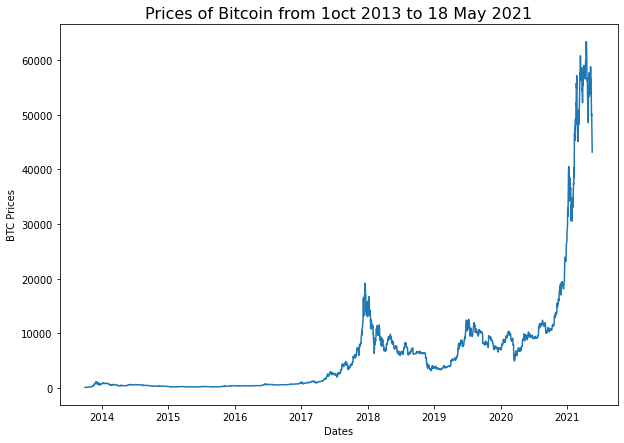

In [ ]:
# Plot form CSV 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Prices")
plt.title("Prices of Bitcoin from 1oct 2013 to 18 May 2021",fontsize=16)
plt.xlabel("Dates");

## Foramt Data Part1: Create Train and Test sets of our Time Series Data

### Creating train and test sets with time series data in **Wrong Way**

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin data array
time_steps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test split for time series data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(timesteps,
                                               prices,
                                               test_size=0.2,
                                               random_state=42)

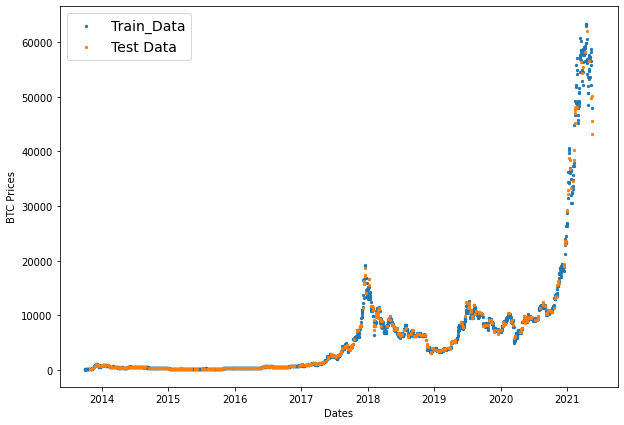

In [ ]:
# Plotting wrong train and test split 
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train_Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Dates")
plt.ylabel("BTC Prices")
plt.legend(fontsize=14)
plt.show();

### Create train and test sets for time series(the right way)

In [ ]:
# Create train and test splits the right way for the Time Series Data
split_size=int(0.8*len(prices)) #80% train and 20% test

# Create train data splits (everything before the split)
X_train,y_train=timesteps[:split_size],prices[:split_size]
X_test,y_test=timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

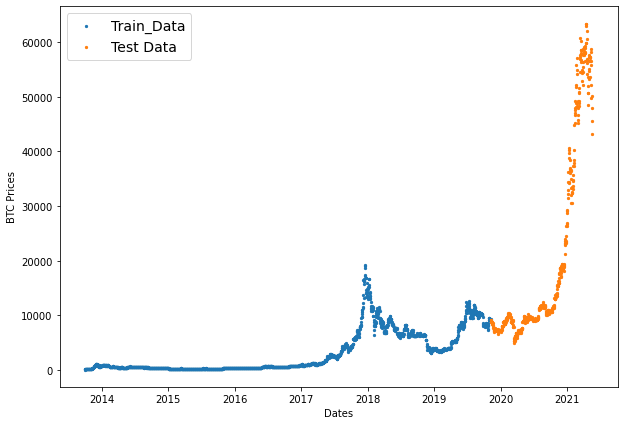

In [ ]:
# Plot correctly made splits
# Plotting wrong train and test split 
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train_Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Dates")
plt.ylabel("BTC Prices")
plt.legend(fontsize=14)
plt.show();

## Crating a plotting Function 

> Writting the same code again and again is preety tedious so lets code it into a function

In [ ]:
# Create a function to plot the time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  """
  Plot time steps (a series of points in time) against values (a series of values across timesteps)

  Parameters:
  ---------
  timesteps: array of timesteps values
  values: array of values across time 
  start: wher to start the plot (settign a value will index from strat of timesteps)
  end: where to end the plot (similar to start but for the end)
  label: label to show on the plot about the values
  """

  # Plot the series
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

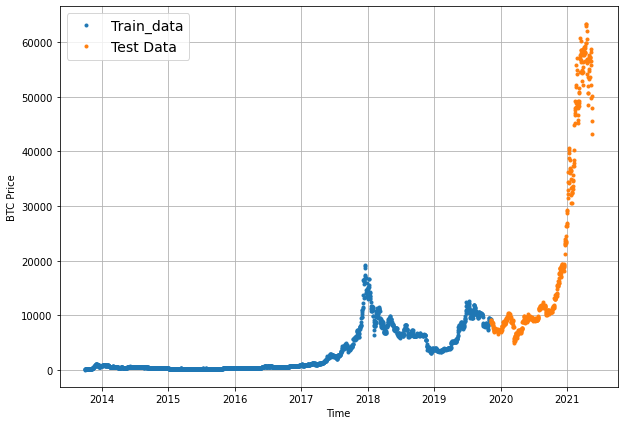

In [ ]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train_data")
plot_time_series(timesteps=X_test,values=y_test,label="Test Data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling Experiments and see which mdoel performs best.

## Model 0: Nsive Firecast(baseline model)

The Formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timesteps t (y-hat) is equal to the value at timsteps t-1 (previous timesteps- this for a horizon of 1.

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10/

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

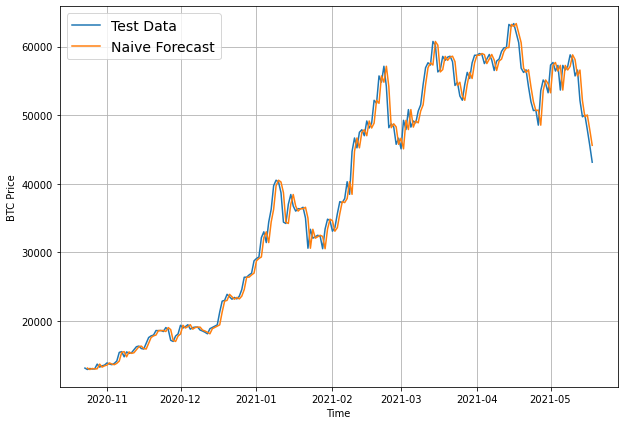

In [ ]:
# Plot the naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train,values=y_train,label="Train Data")
plot_time_series(timesteps=X_test,format="-",start=350,values=y_test,label="Test Data")
plot_time_series(timesteps=X_test[1:],format="-",start=350,values=naive_forecast,label="Naive Forecast")


## Evaluating a Time Series model 
 let's look into some evaluation metrics for time series forecasting. 

 What are we doing?

 We are predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some some regression like metrics.

A few common regression metrics( which can also be used for time series forecasting).

* MAE - Mean Absolute Error.
* MSE - Mean Squared Error.
* RMSE - Root Mean Square error.
* MAPE/sMAPE - (Symmetric) Mean Absolute Percentage Error.

**Note:** For all of the above metrics, lower is beter.

Ex - An MAE of 0 is better than MAE of 100.

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation 
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true,y_pred):
  
  # WE need to make sure float32 data type(for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_true=tf.cast(y_true,dtype=tf.float32)

  # Calculating Mean Absolute error
  MAE=tf.keras.metrics.mean_absolute_error(y_true,y_pred)

  # Calculating Mean squared error
  MSE=tf.keras.metrics.mean_squared_error(y_true,y_pred)

  # Calculating the Root Mean Squared Error
  RMSE=tf.sqrt(MSE)
  
  # Calculating the mean absolute percentage error
  MAPE=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  
  # Calculating Mean Absolute Scaled Error
  MASE=mean_absolute_scaled_error(y_true,y_pred)

  # Putting all the errors into a Dictionary
  return {'MAE':MAE.numpy(),
          'MSE':MSE.numpy(),
          'RMSE':RMSE.numpy(),
          'MAPE':MAPE.numpy(),
          'MASE':MASE.numpy()}

That's one goog looking evaluation function

Let's now see if it works

In [ ]:
naive_results=evaluate_preds(y_true=y_test[1:],
                             y_pred=naive_forecast)
naive_results

{'MAE': 567.9802183722998,
 'MAPE': 2.5165248502692306,
 'MASE': 0.99957,
 'MSE': 1147547.078083598,
 'RMSE': 1071.2362382236693}

## Format Data Part2: Windowing our dataset

Why do we Window?

We window our time series dataset to turn our data into a supervised learning problem.


```
Windows for one week
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]

**Note:** Here [7,8,9] on the right side are the labels to the windows.
 
```

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
# What we want to do with our bitcoin data
print(f"We need to use this: {btc_price[:7]} to predict this:{btc_price[7]}")

We need to use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this:123.033


In [ ]:
# Let's setup global varaibles for window and horizon size
HORIZON=1 # predict next 1 day
WINDOW_SIZE=7 # we need to use the past week data to predict the next day price


In [ ]:
# Create a function to label window data
def get_labelled_window(x,horizon=HORIZON):
  """
  Create labels for windowed dataset

  E.g. if horizon=1
  Input: [0,1,2,3,4,5,6,7] -> output: ([0,1,2,3,4,5,6], [7])
  """

  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
# Testing our above built functions
test_window,test_label=get_labelled_window(tf.expand_dims(tf.range(8),axis=0))

print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to our windowed data.

However, this only works on a small scale

We need a way to across our entire time series data.

We could do this with python for loops, however, for large time series, that'd be quite slow. To speed things up , we'll leverage numpy array's indexing.

Our function will:

1. Create a windows step of of specific window size (e.g. [0,1,2,3,4,5,6])


2. Use Numpy indexing to create aa 2D array of multiple window steps, for example:

```
[[0,1,2,3,4,5,6],
[1,2,3,4,5,6,7],
[2,3,4,5,6,7,8]]
```


3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price f bitcoin)


4. Uses our `get_labeled_windows` function we created above to turn the window steps into winow with a specified horizo.

In [ ]:
import numpy as np
def make_window(x,window_size=WINDOW_SIZE, horizon=HORIZON):
  '''
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  '''

  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to acount for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # Create 2D arary of windows of size window_size
  # print(f"Window indexes:\n {window_indexes,window_indexes.shape}")

  # 3. Take on the target array (a time series with 2D array of multiple windo steps)
  windowed_array=x[window_indexes]
  # print(windowed_array)

  # Get the labelled windows
  windows,labels= get_labelled_window(windowed_array,horizon=horizon)

  return windows,labels

In [ ]:
full_windows,full_labels=make_window(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first three windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


In [ ]:
# View the last 3 labels and windows
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> label: [43144.47129086]


**Note:** There's a function which does the similar to the above in tf.keras.preprocessing, an extensiokn could be to try and replicae what we've done using the premade function.

Refer: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into train and test set

In [ ]:
# Make the train, test split

def make_train_test_split(windows,labels,test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size=int(len(windows)*(1-test_split)) # this will default to 80% train and 20% test
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels

In [ ]:
# Create train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_split(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_labels[:5],test_labels[:5]

(array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]), array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Because our models performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our  models best performance against the other models best performances.

For example: If our model performs the best on epoch 55(but we're training for 100 epoch) we wnat to load and evaluate the model saved on epoch 55.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 

def create_model_checkpoint(model_name,save_path="Model_Ecperiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0, #output only a limited amount of text
                                            save_best_only=True,
                                            monitor="val_loss")

## Model 1: Dense model(window=7 , horizon=1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU.
* An output layer with linear activation (NO ACTIVATION).
* Adam Optimizationand MAE loss function.
Batch Size of 128 (previously we've used 32)
* 100 epochs.

Why these valyes?

I picked them out of experimentation.

* *Hyperparameters* = Value a machine learning practitioner (MEE!) can adjust themselves.

* **Parameters** = values a model learns on its own.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the random seed for as reproducible results as possible
tf.random.set_seed(42)

# Create the model

model_1=tf.keras.Sequential([
                             layers.Dense(128,activation="relu"),
                             layers.Dense(HORIZON,activation="linear") # linear actiavtion is same as having no activation
],name="Model_1_Dense")

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the mode
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 62ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5828 - val_mae: 2279.5828 - val_mse: 12772095.0000
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9375 - val_loss: 1005.9864 - val_mae: 1005.9864 - val_mse: 3441759.2500
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0312 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 165.0899 - mae: 165.0899 - mse: 145490.8594 - val_loss: 895.2405 - val_mae: 895.2405 - val_mse: 2564606.2500
Epoch 6/100
18/18 [==============================] - 1s 34ms/step - loss: 158.5

In [ ]:
# Evaluate model on test data4
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5322 - mae: 662.5322 - mse: 1358192.1250


[662.5322265625, 662.5322265625, 1358192.125]

In [ ]:
# Load in the saved bets performing model_1 and evaluate it on the test data
model_1=tf.keras.models.load_model("/content/Model_Ecperiments/Model_1_Dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]

## Maiking forecast with a model( on the test dataset)

To make forecast on the test dataset (note: these won't be actua;l forecasts, they're only pseudo because actual forecasts are into the future), let's write a function to:

1. Take in a train model.
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data to the models predict() method
4. Returns the predictions.

In [ ]:
def make_preds(model,input_data):
  '''
  Uses model to make prdictions on the input data.
  '''

  forecast=model.predict(input_data)
  return tf.squeeze(forecast) # Return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test_dataset and view the results
model_1_pred=make_preds(model_1,test_windows)
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
       8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>

In [ ]:
# # Let's plot the model_1 predictions 
# offset=450
# plt.figure(figsize=(10,7))

# plot_time_series(timesteps=X_test[-len(test_windows):],
#                  values=test_labels[:,0],
#                  start=offset,
#                  label="Test Data")

# plot_time_series(timesteps=X_test[-len(test_windows):],
#                  values=model_1_results,
#                  start=offset,
#                  format="-",
#                  label="Model_1_Preds")

## Building `MODEL2` with:
1. window_size=30
2. horizon=1

In [ ]:
WINDOW_SIZE=30
HORIZON=1
full_windows,full_labels=make_window(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [ ]:
# Splitting the data into train and test split
train_windows,test_windows,train_labels,test_labels=make_train_test_split(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2205, 2205, 552, 552)

In [ ]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [ ]:
tf.random.set_seed(42)

# Construct the model
model_2=tf.keras.Sequential([
                             layers.Dense(128,activation="relu"),
                             layers.Dense(HORIZON,activation="linear")
],name="model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer="adam")

# Fit 
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
69/69 [==============================] - 1s 11ms/step - loss: 452.9572 - val_loss: 1612.1152
Epoch 2/100
69/69 [==============================] - 1s 9ms/step - loss: 203.3967 - val_loss: 1515.5775
Epoch 3/100
69/69 [==============================] - 1s 9ms/step - loss: 217.5900 - val_loss: 1220.7604
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 179.9106 - val_loss: 1281.1294
Epoch 5/100
69/69 [==============================] - 1s 9ms/step - loss: 185.4996 - val_loss: 1064.3698
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 183.0332 - val_loss: 1075.5713
Epoch 7/100
69/69 [==============================] - 1s 9ms/step - loss: 188.4272 - val_loss: 982.5352
Epoch 8/100
69/69 [==============================] - 1s 13ms/step - loss: 160.1765 - val_loss: 841.1382
Epoch 9/100
69/69 [==============================] - 0s 2ms/step - loss: 147.3812 - val_loss: 848.9306
Epoch 10/100
69/69 [==============================] - 1s 10ms/ste

In [ ]:
# Evaluate model_2 on the test data
model_2=tf.keras.models.load_model("/content/Model_Ecperiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 583.3080


583.3080444335938

In [ ]:
# Get forecast predictions 
model_2_preds=make_preds(model_2,
                         input_data=test_windows)

In [ ]:
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8827.51  , 8828.148 , 8738.688 , 8576.663 , 8434.338 , 8362.966 ,
       8188.7515, 8142.291 , 8138.424 , 7726.5205], dtype=float32)>

In [ ]:
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)

In [ ]:
model_2_results

{'MAE': 583.308,
 'MAPE': 2.642229,
 'MASE': 1.0196279,
 'MSE': 1201422.4,
 'RMSE': 1096.0941}

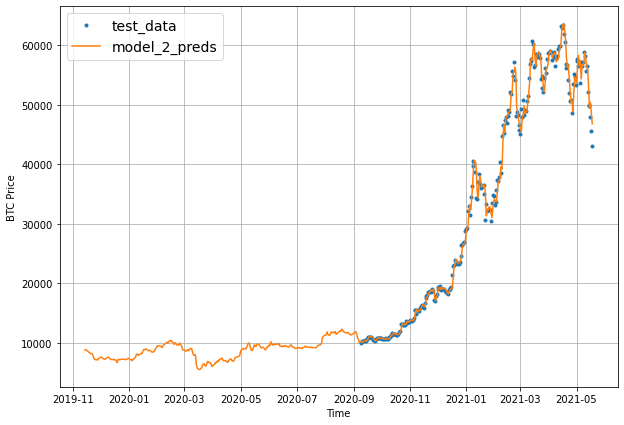

In [ ]:
# Plot our model_2
offset=300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,format="-",label="model_2_preds")

## Model 3: Dense (Windows =30 horizon=7)

In [ ]:
WINDOWS=30
HORIZON=7
full_windows,full_labels=make_window(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_split(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Construct the model
model_3=tf.keras.Sequential([
                             layers.Dense(128,activation="relu"),
                             layers.Dense(HORIZON)
],name="model_3_dense")

# Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
# Fit 
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
69/69 [==============================] - 1s 11ms/step - loss: 741.8994 - val_loss: 1965.7888
Epoch 2/100
69/69 [==============================] - 1s 13ms/step - loss: 367.1797 - val_loss: 1801.2256
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 314.3242 - val_loss: 1710.5671
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: 292.6833 - val_loss: 1500.5936
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 279.3594 - val_loss: 1838.1184
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 268.7654 - val_loss: 1563.1382
Epoch 7/100
69/69 [==============================] - 1s 9ms/step - loss: 278.2786 - val_loss: 1393.0095
Epoch 8/100
69/69 [==============================] - 1s 10ms/step - loss: 266.2526 - val_loss: 1380.7180
Epoch 9/100
69/69 [==============================] - 0s 3ms/step - loss: 258.4993 - val_loss: 1503.3103
Epoch 10/100
69/69 [==============================] - 1s 10

In [ ]:
len(full_windows),len(full_labels)

(2751, 2751)

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1489.6638


1489.663818359375

In [ ]:
model_3_pred=make_preds(model_3,
                        input_data=test_windows)

In [ ]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_pred)
model_3_results

{'MAE': array([ 270.55148,  180.68443,  220.52678,  184.46764,  212.06432,
         185.70334,  194.84138,  212.43185,  327.84598,  389.25668,
         447.0168 ,  463.26187,  518.371  ,  501.23834,  200.57666,
         312.30023,  382.2793 ,  626.4827 ,  608.53076,  643.729  ,
         328.6313 ,  282.38394,  115.17348,  136.1068 ,  305.42914,
         374.66336,  461.71115,  439.8921 ,  374.70697,  200.8058 ,
         130.17326,   85.66002,  164.76549,  213.1266 ,  292.4488 ,
         305.0388 ,  215.92166,  276.7071 ,  313.62457,  533.82367,
         881.11584,  392.96225,  352.26193,  424.2862 ,  258.65387,
         322.43854,  312.40298,  300.9536 ,  280.48138,  358.506  ,
         322.66916,  261.065  ,  160.66371,  285.65717,  493.5311 ,
         632.9024 ,  924.4593 ,  857.00244,  803.24005,  854.0135 ,
         692.68195,  457.66928,  444.65945,  724.4681 ,  784.0944 ,
         779.81415,  785.4107 ,  862.5371 ,  383.52066,  180.73508,
         183.59584,  197.05246,  240.8302

## Make our evaluation function wor for larger Horizon

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1489.6638


1489.663818359375

In [ ]:
tf.reduce_mean(model_3_results['MAE']).numpy()

1489.664

In [ ]:
def evaluate_preds(y_true,y_pred):
  
  # WE need to make sure float32 data type(for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_true=tf.cast(y_true,dtype=tf.float32)

  # Calculating Mean Absolute error
  MAE=tf.keras.metrics.mean_absolute_error(y_true,y_pred)

  # Calculating Mean squared error
  MSE=tf.keras.metrics.mean_squared_error(y_true,y_pred)

  # Calculating the Root Mean Squared Error
  RMSE=tf.sqrt(MSE)
  
  # Calculating the mean absolute percentage error
  MAPE=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  
  # Calculating Mean Absolute Scaled Error
  MASE=mean_absolute_scaled_error(y_true,y_pred)

  if MAE.ndim>0:
    MAE=tf.reduce_mean(MAE)
    MSE=tf.reduce_mean(MSE)
    MAPE=tf.reduce_mean(MAPE)
    MASE=tf.reduce_mean(MASE)
    RMSE=tf.reduce_mean(RMSE)
    

  # Putting all the errors into a Dictionary
  return {'MAE':MAE.numpy(),
          'MSE':MSE.numpy(),
          'RMSE':RMSE.numpy(),
          'MAPE':MAPE.numpy(),
          'MASE':MASE.numpy()}

In [ ]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_pred)
model_3_results

{'MAE': 1489.664,
 'MAPE': 6.757916,
 'MASE': 2.6507733,
 'MSE': 6434255.5,
 'RMSE': 1652.1354}

## Visualising the Model 3 Results

We've made an evaluated predictions with our model_3, let's visualize, visualize, visualize

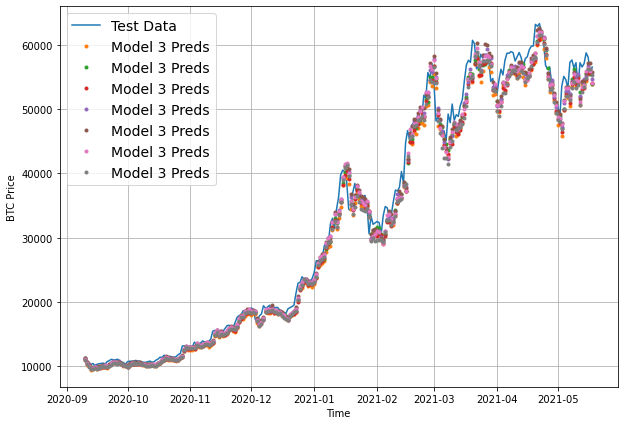

In [ ]:
plt.figure(figsize=(10,7))
offset=300

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],format="-",start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_labels):],values=model_3_pred,format=".",start=offset,label="Model 3 Preds")

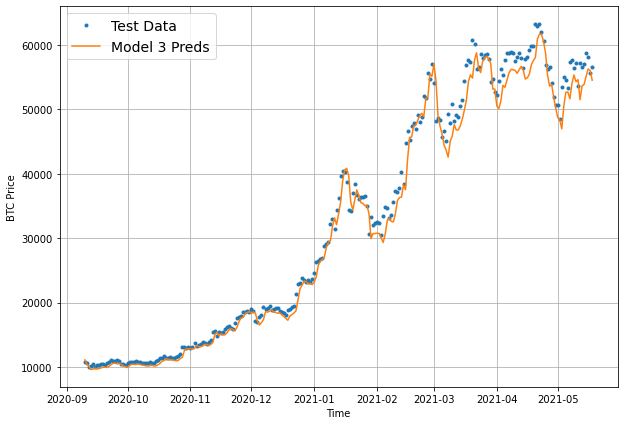

In [ ]:
plt.figure(figsize=(10,7))
offset=300

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],format=".",start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_labels):],values=tf.reduce_mean(model_3_pred,axis=1),format="-",start=offset,label="Model 3 Preds")

## Which of our model is performing the besr do far?

So we've trained a few models, now let's comapare them and see how they've gone....

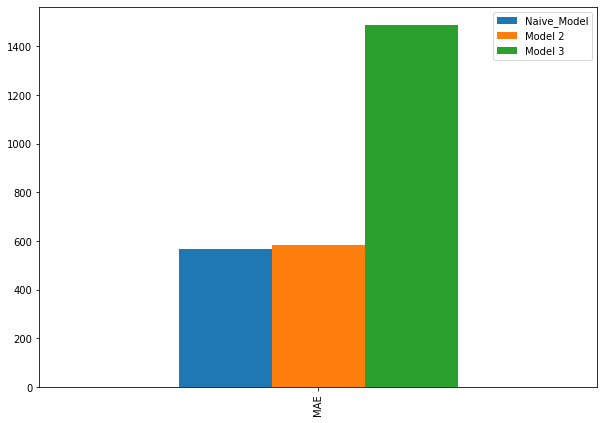

In [ ]:
pd.DataFrame({'Naive_Model':naive_results['MAE'],
              # 'Model 1':model_1_results['MAE'],
              'Model 2':model_2_results['MAE'],
              'Model 3': model_3_results['MAE']},index=['MAE']).plot(figsize=(10,7),kind='bar')

## Model 4 : Conv1D

In [ ]:
HORIZON=1 # Predict next day of bitcoin prices
WINDOW_SIZE=7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows,full_labels=make_window(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
# Split the data into train and test set
train_windows,test_windows,train_labels,test_labels=make_train_test_split(full_windows,full_labels)

we need an input shapeof: `(batch_size,input_shape,input_dim)`....

However our data isn't in that shape yet..

In [ ]:
# Cheack data input shape
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1d layer we have to reshape it in order to make sure it works
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x,axis=1)) # add an extra dimension for input dim 

In [ ]:
# Test out our lambda layer
print(f"Originam shape {x.shape}") # Window size
print(f'Expand Dims shape {expand_dims_layer(x).shape}')
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Originam shape (7,)
Expand Dims shape (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create the Conv1D model
model_4=tf.keras.Sequential([
                             layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
                             layers.Conv1D(filters=128, kernel_size=5, strides=1,padding="causal"),
                             layers.Dense(HORIZON)
],name="model_4_Conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer="adam")

# Fit the model_4
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Ecperiments/model_4_Conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 641.9175


641.91748046875

In [ ]:
# Load the best model predictions of model_4
loaded_model_4=tf.keras.models.load_model("Model_Ecperiments/model_4_Conv1D/")

In [ ]:
loaded_model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 566.1389


566.138916015625

In [ ]:
# Make predictions
model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8724.804, 8654.642, 8920.05 , 8650.132, 8607.097], dtype=float32)>

In [ ]:
# Calculate the results
model_4_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_4_preds)
model_4_results

{'MAE': 641.9175,
 'MAPE': 2.909884,
 'MASE': 1.1276712,
 'MSE': 1319684.9,
 'RMSE': 1148.7754}

## Model 5: Adding a LSTM layer


In [ ]:
inputs=tf.keras.layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
# x=layers.LSTM(128,return_sequences=True)(x)
x=layers.LSTM(128,activation="relu")(x)
# x=layers.Dense(32,activation="relu")(x)
outputs=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs,outputs,name="Model_5_LSTM")
# Compile the model
model_5.compile(loss="mae",
                optimizer="adam")

# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
62/70 [=========================>....] - ETA: 0s - loss: 1060.4526INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 4s 37ms/step - loss: 969.6324 - val_loss: 1070.2206
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 191.4809 - val_loss: 1180.3091
Epoch 3/100
64/70 [==========================>...] - ETA: 0s - loss: 188.0289INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 37ms/step - loss: 185.7954 - val_loss: 1020.7461
Epoch 4/100
66/70 [===========================>..] - ETA: 0s - loss: 179.3711INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 33ms/step - loss: 179.6483 - val_loss: 1007.2805
Epoch 5/100
70/70 [==============================] - ETA: 0s - loss: 176.0220INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 35ms/step - loss: 176.0220 - val_loss: 960.5434
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 168.5616 - val_loss: 1018.6646
Epoch 7/100
59/70 [========================>.....] - ETA: 0s - loss: 171.2604INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 166.2017 - val_loss: 957.8641
Epoch 8/100
66/70 [===========================>..] - ETA: 0s - loss: 166.5864INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 39ms/step - loss: 165.9792 - val_loss: 870.3132
Epoch 9/100
61/70 [=========================>....] - ETA: 0s - loss: 156.0121INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 154.8565 - val_loss: 841.5271
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 155.5941 - val_loss: 901.8959
Epoch 11/100
70/70 [==============================] - 0s 5ms/step - loss: 149.7800 - val_loss: 867.2162
Epoch 12/100
64/70 [==========================>...] - ETA: 0s - loss: 144.0726INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 33ms/step - loss: 144.3385 - val_loss: 782.1130
Epoch 13/100
70/70 [==============================] - 0s 5ms/step - loss: 142.7681 - val_loss: 784.8575
Epoch 14/100
70/70 [==============================] - 0s 4ms/step - loss: 138.3159 - val_loss: 866.8944
Epoch 15/100
64/70 [==========================>...] - ETA: 0s - loss: 138.9482INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 38ms/step - loss: 136.8062 - val_loss: 745.6060
Epoch 16/100
70/70 [==============================] - ETA: 0s - loss: 132.1875INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 132.1875 - val_loss: 724.9080
Epoch 17/100
70/70 [==============================] - 0s 5ms/step - loss: 129.0190 - val_loss: 746.1477
Epoch 18/100
68/70 [============================>.] - ETA: 0s - loss: 140.2470INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 37ms/step - loss: 139.1706 - val_loss: 691.6811
Epoch 19/100
70/70 [==============================] - 0s 4ms/step - loss: 128.3749 - val_loss: 713.7805
Epoch 20/100
70/70 [==============================] - 0s 4ms/step - loss: 123.3403 - val_loss: 787.2421
Epoch 21/100
70/70 [==============================] - 0s 4ms/step - loss: 124.8821 - val_loss: 707.1525
Epoch 22/100
64/70 [==========================>...] - ETA: 0s - loss: 124.0129INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 39ms/step - loss: 122.9631 - val_loss: 656.6096
Epoch 23/100
70/70 [==============================] - 0s 4ms/step - loss: 124.5818 - val_loss: 689.3555
Epoch 24/100
59/70 [========================>.....] - ETA: 0s - loss: 121.1654INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 119.6072 - val_loss: 639.5823
Epoch 25/100
56/70 [=======================>......] - ETA: 0s - loss: 123.6247INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 121.3455 - val_loss: 634.0726
Epoch 26/100
70/70 [==============================] - 0s 5ms/step - loss: 127.0711 - val_loss: 640.9435
Epoch 27/100
70/70 [==============================] - 0s 5ms/step - loss: 123.2863 - val_loss: 666.8245
Epoch 28/100
59/70 [========================>.....] - ETA: 0s - loss: 113.5457INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 35ms/step - loss: 115.9771 - val_loss: 621.5233
Epoch 29/100
69/70 [============================>.] - ETA: 0s - loss: 118.1585INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 40ms/step - loss: 117.6874 - val_loss: 617.0741
Epoch 30/100
70/70 [==============================] - 0s 5ms/step - loss: 117.7475 - val_loss: 630.6074
Epoch 31/100
70/70 [==============================] - 0s 4ms/step - loss: 118.8102 - val_loss: 697.9971
Epoch 32/100
63/70 [==========================>...] - ETA: 0s - loss: 115.6357INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 116.6738 - val_loss: 612.0690
Epoch 33/100
70/70 [==============================] - 0s 4ms/step - loss: 116.6295 - val_loss: 636.1984
Epoch 34/100
70/70 [==============================] - 0s 4ms/step - loss: 124.1131 - val_loss: 645.0769
Epoch 35/100
70/70 [==============================] - 0s 4ms/step - loss: 117.4308 - val_loss: 645.8502
Epoch 36/100
63/70 [==========================>...] - ETA: 0s - loss: 119.0151INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 35ms/step - loss: 118.7268 - val_loss: 600.6506
Epoch 37/100
70/70 [==============================] - 0s 4ms/step - loss: 114.2303 - val_loss: 631.4335
Epoch 38/100
70/70 [==============================] - 0s 5ms/step - loss: 121.4206 - val_loss: 606.9586
Epoch 39/100
70/70 [==============================] - 0s 4ms/step - loss: 115.7663 - val_loss: 732.3838
Epoch 40/100
63/70 [==========================>...] - ETA: 0s - loss: 120.0072INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 41ms/step - loss: 119.1630 - val_loss: 598.3817
Epoch 41/100
70/70 [==============================] - 0s 5ms/step - loss: 112.4364 - val_loss: 623.4127
Epoch 42/100
59/70 [========================>.....] - ETA: 0s - loss: 109.7198INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 35ms/step - loss: 112.6913 - val_loss: 592.0466
Epoch 43/100
70/70 [==============================] - 0s 5ms/step - loss: 114.8345 - val_loss: 599.7827
Epoch 44/100
70/70 [==============================] - 0s 5ms/step - loss: 120.3257 - val_loss: 682.3389
Epoch 45/100
62/70 [=========================>....] - ETA: 0s - loss: 111.5320INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 112.4975 - val_loss: 585.6356
Epoch 46/100
70/70 [==============================] - 0s 4ms/step - loss: 125.0072 - val_loss: 587.7964
Epoch 47/100
70/70 [==============================] - 0s 5ms/step - loss: 114.4948 - val_loss: 732.9381
Epoch 48/100
70/70 [==============================] - 0s 4ms/step - loss: 114.8482 - val_loss: 593.4194
Epoch 49/100
70/70 [==============================] - 0s 4ms/step - loss: 110.0260 - val_loss: 618.1118
Epoch 50/100
64/70 [==========================>...] - ETA: 0s - loss: 108.3007INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 111.3755 - val_loss: 581.4030
Epoch 51/100
70/70 [==============================] - 0s 4ms/step - loss: 112.9776 - val_loss: 634.1441
Epoch 52/100
70/70 [==============================] - 0s 5ms/step - loss: 120.0075 - val_loss: 582.4366
Epoch 53/100
70/70 [==============================] - 0s 5ms/step - loss: 110.8329 - val_loss: 588.6456
Epoch 54/100
70/70 [==============================] - 0s 4ms/step - loss: 115.8048 - val_loss: 614.7104
Epoch 55/100
63/70 [==========================>...] - ETA: 0s - loss: 114.5856INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 40ms/step - loss: 111.1078 - val_loss: 577.6844
Epoch 56/100
62/70 [=========================>....] - ETA: 0s - loss: 114.4105INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 33ms/step - loss: 113.7765 - val_loss: 577.1140
Epoch 57/100
70/70 [==============================] - 0s 4ms/step - loss: 112.0273 - val_loss: 594.9710
Epoch 58/100
70/70 [==============================] - 0s 4ms/step - loss: 111.2989 - val_loss: 585.7703
Epoch 59/100
70/70 [==============================] - 0s 4ms/step - loss: 108.9913 - val_loss: 578.1297
Epoch 60/100
70/70 [==============================] - 0s 4ms/step - loss: 109.5418 - val_loss: 599.8608
Epoch 61/100
62/70 [=========================>....] - ETA: 0s - loss: 111.7929INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 33ms/step - loss: 110.3917 - val_loss: 575.3072
Epoch 62/100
70/70 [==============================] - 0s 4ms/step - loss: 108.4107 - val_loss: 584.4731
Epoch 63/100
70/70 [==============================] - 0s 4ms/step - loss: 109.5802 - val_loss: 600.7617
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 111.7501 - val_loss: 595.2150
Epoch 65/100
70/70 [==============================] - 0s 4ms/step - loss: 111.5152 - val_loss: 577.0729
Epoch 66/100
70/70 [==============================] - 0s 5ms/step - loss: 107.7392 - val_loss: 608.9811
Epoch 67/100
70/70 [==============================] - 0s 4ms/step - loss: 108.8403 - val_loss: 590.1477
Epoch 68/100
64/70 [==========================>...] - ETA: 0s - loss: 108.1147INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 39ms/step - loss: 107.7671 - val_loss: 570.7787
Epoch 69/100
70/70 [==============================] - 0s 5ms/step - loss: 111.8678 - val_loss: 669.3760
Epoch 70/100
70/70 [==============================] - 0s 4ms/step - loss: 109.5167 - val_loss: 604.1665
Epoch 71/100
70/70 [==============================] - 0s 4ms/step - loss: 121.0681 - val_loss: 614.1630
Epoch 72/100
70/70 [==============================] - 0s 4ms/step - loss: 112.6877 - val_loss: 654.6266
Epoch 73/100
70/70 [==============================] - 0s 5ms/step - loss: 109.1735 - val_loss: 578.3164
Epoch 74/100
57/70 [=======================>......] - ETA: 0s - loss: 114.4345INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 113.8161 - val_loss: 569.7075
Epoch 75/100
70/70 [==============================] - 0s 4ms/step - loss: 108.7263 - val_loss: 601.0025
Epoch 76/100
70/70 [==============================] - 0s 4ms/step - loss: 114.2301 - val_loss: 594.9578
Epoch 77/100
70/70 [==============================] - 0s 4ms/step - loss: 108.7008 - val_loss: 577.7589
Epoch 78/100
60/70 [========================>.....] - ETA: 0s - loss: 111.9634INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 111.0105 - val_loss: 569.4103
Epoch 79/100
70/70 [==============================] - 0s 5ms/step - loss: 109.8317 - val_loss: 594.8790
Epoch 80/100
70/70 [==============================] - 0s 4ms/step - loss: 113.9424 - val_loss: 570.7939
Epoch 81/100
70/70 [==============================] - 0s 5ms/step - loss: 108.7375 - val_loss: 589.2044
Epoch 82/100
70/70 [==============================] - 0s 5ms/step - loss: 114.2239 - val_loss: 715.7050
Epoch 83/100
70/70 [==============================] - 0s 5ms/step - loss: 112.0529 - val_loss: 617.8430
Epoch 84/100
60/70 [========================>.....] - ETA: 0s - loss: 107.6933INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 3s 40ms/step - loss: 108.8921 - val_loss: 569.3564
Epoch 85/100
70/70 [==============================] - 0s 4ms/step - loss: 106.9292 - val_loss: 583.8748
Epoch 86/100
70/70 [==============================] - 0s 4ms/step - loss: 112.6346 - val_loss: 591.4445
Epoch 87/100
70/70 [==============================] - 0s 5ms/step - loss: 108.1975 - val_loss: 604.3378
Epoch 88/100
70/70 [==============================] - 0s 5ms/step - loss: 110.6075 - val_loss: 571.5448
Epoch 89/100
70/70 [==============================] - 0s 5ms/step - loss: 111.9656 - val_loss: 728.5403
Epoch 90/100
70/70 [==============================] - 0s 4ms/step - loss: 112.8084 - val_loss: 637.6580
Epoch 91/100
70/70 [==============================] - 0s 4ms/step - loss: 110.7987 - val_loss: 575.7756
Epoch 92/100
70/70 [==============================] - 0s 5ms/step - loss: 107.7846 - val_loss: 592.3121
Epoch 93/100
70/70 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 35ms/step - loss: 111.2353 - val_loss: 567.9799
Epoch 98/100
60/70 [========================>.....] - ETA: 0s - loss: 111.8450INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 110.0948 - val_loss: 566.5408
Epoch 99/100
70/70 [==============================] - 0s 5ms/step - loss: 108.9548 - val_loss: 622.8715
Epoch 100/100
69/70 [============================>.] - ETA: 0s - loss: 108.9542INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/Model_5_LSTM/assets


70/70 [==============================] - 2s 34ms/step - loss: 108.5387 - val_loss: 565.6561


In [ ]:
# Load in the best version of model 5 and evaluate it on the test data
model_5_loaded=tf.keras.models.load_model("Model_Ecperiments/Model_5_LSTM/")
model_5_loaded.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.6561


565.6561279296875

In [ ]:
model_5_preds=make_preds(model_5_loaded,test_windows)
model_5_preds[:5]


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8872.392, 8796.257, 9046.454, 8781.897, 8750.354], dtype=float32)>

In [ ]:
# Evalute the model_5_predictions
model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)
model_5_results

{'MAE': 565.656,
 'MAPE': 2.516257,
 'MASE': 0.9937009,
 'MSE': 1162722.0,
 'RMSE': 1078.2959}

## Make a Multivariate Time Series data

Before we add feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke sir tweeted on that day...

* day 1 - 0
* day 2 - 0
* day 3 - 0

What's the better feature to use?

How about the bitcoin halving events?

In [ ]:
# Let's make a Multivariate Time Series 
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving to our dataset
block_reward_1=50 # 3 January 2009 - this block reward isn't in ouot dataset(our data starts from 01 october 2013)
block_reward_2=25 # 8 November 2012
block_reward_3=12.5 # 9 July 2016 
block_reward_4=6.25 # 12 May 2020

# Block reward dates
block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")

In [ ]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

> **Note:** We have not taken `block_reward_2_datetime` below because out dataset doesn't have the range of dates form `2012`.

In [ ]:
# Create data ranges of where specific block_reward value should be 
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_2_days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [ ]:
# Add in block reward column
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

# Add in block reward values
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


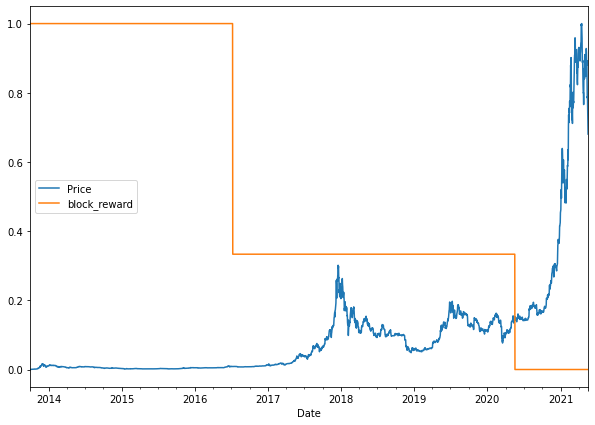

In [ ]:
# Plot the block reward VS price over time 
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                                                     columns=bitcoin_prices_block.columns,
                                                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

### Difference between `Univariate` and `Multivariate` data.
In univariate data we have only one variable to train on but in multivariate we have more than one varaible to train on.

## Making a windowes dataset with pandas.

Previously we have turned our univariate time series into windowed dataset using the helper functions above.

However, since now we've got our multivariate data this methods wont work.

Not to worry, we can use the `pandas.DataFrame.shift()` to windoe our multivariate data.

In [ ]:
# Setup our dataset Hyperparameters
HORIZIN=1
WINDOW_SIZE=7

In [ ]:
# Make a copy of bitcoin hiistorical data with block_reward feature
bitcoin_prices_windowed=bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


**Note:** What we've done is created a way to window our dataset directly from a pandas DataFrame.\
```
[0,1,2,3,4,5,6,block_reward] -> [7]
[1,2,3,4,5,6,7,block_reward] -> [8]
[2,3,4,5,6,7,8,block_reward] -> [9]
```

In [ ]:
bitcoin_prices_windowed.isna().sum()

Price           0
block_reward    0
Price+1         1
Price+2         2
Price+3         3
Price+4         4
Price+5         5
Price+6         6
Price+7         7
dtype: int64

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test set using indexing 
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

## Model 6: Building a Multivariate model similar to our Model 1

In [ ]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
                             layers.Dense(128,activation="relu"),
                             layers.Dense(HORIZON)
],name="model_6_multivariate_dense")

# Compiling the model
model_6.compile(loss="mae",
                optimizer="adam")

# Fit thr model 
model_6.fit(X_train,
            y_train,
            validation_data=(X_test,y_test),
            batch_size=128,
            epochs=100,
            verbose=1,
            callbacks=create_model_checkpoint(model_name=model_6.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 2853.4023INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 39ms/step - loss: 1234.6880 - val_loss: 2061.8428
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 337.6969INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 351.5003 - val_loss: 1908.7257
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.1817INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 235.4110 - val_loss: 1329.5310
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 271.0568INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 208.6456 - val_loss: 1102.0128
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5595 - val_loss: 1108.6157
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3714INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 187.2317 - val_loss: 1035.9969
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.4434INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 182.0119 - val_loss: 1019.2738
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5187INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 175.6998 - val_loss: 977.7345
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1548INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 170.1650 - val_loss: 953.9047
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 177.7931INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 164.3849 - val_loss: 912.1832
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 171.4948INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 158.0432 - val_loss: 871.2955
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 146.7134INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 151.8589 - val_loss: 853.0025
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 150.1562 - val_loss: 899.1047
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 153.5456INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 147.8199 - val_loss: 845.0212
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 147.3238INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 142.5173 - val_loss: 788.1892
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2893INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 49ms/step - loss: 137.1697 - val_loss: 770.6404
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4618INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 136.0208 - val_loss: 763.1682
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 144.2260INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 135.4696 - val_loss: 753.5217
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 130.7954 - val_loss: 758.8008
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.1222INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 128.6773 - val_loss: 703.7003
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 163.2315INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 129.2461 - val_loss: 693.4249
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8202 - val_loss: 703.4455
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 127.8713 - val_loss: 698.5743
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4187INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 122.4124 - val_loss: 672.5024
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.0910INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 121.3311 - val_loss: 666.3888
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 127.9873 - val_loss: 693.5915
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 181.3063INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 124.8371 - val_loss: 645.3121
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 111.9599INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 119.8579 - val_loss: 641.3582
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2880 - val_loss: 665.6819
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9141INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 121.1822 - val_loss: 640.8664
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 120.4115 - val_loss: 667.9379
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 119.8528INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 118.3126 - val_loss: 618.9241
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8836 - val_loss: 621.7647
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4358INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 114.9744 - val_loss: 611.1620
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 112.5883 - val_loss: 615.9453
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2489 - val_loss: 616.3082
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1561 - val_loss: 612.4215
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 108.7143INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 111.4725 - val_loss: 602.2148
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2392INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 113.2853 - val_loss: 597.4948
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 100.3340INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 109.8442 - val_loss: 594.1258
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6678 - val_loss: 618.8127
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6730 - val_loss: 597.8893
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8469 - val_loss: 598.7606
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 64.0537INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 109.6574 - val_loss: 589.3675
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7725 - val_loss: 611.4677
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 87.0587INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 109.6011 - val_loss: 587.5851
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3633 - val_loss: 634.5783
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3613 - val_loss: 641.6937
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 166.8425INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 112.7560 - val_loss: 581.5450
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7167 - val_loss: 645.5009
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1508 - val_loss: 601.1287
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2310 - val_loss: 604.3257
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7207 - val_loss: 637.5742
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 113.4848 - val_loss: 598.4409
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2513INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 109.9909 - val_loss: 575.7907
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7174 - val_loss: 778.8625
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 124.3417 - val_loss: 684.9153
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7253 - val_loss: 578.1130
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 106.6669 - val_loss: 587.5096
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3718 - val_loss: 604.5571
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 107.3551 - val_loss: 579.4926
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 107.1465 - val_loss: 590.5033
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3243 - val_loss: 656.7147
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 11

INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 112.8277 - val_loss: 571.7211
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0755 - val_loss: 586.5437
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8978 - val_loss: 605.0884
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 112.7144 - val_loss: 721.4471
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 125.0427 - val_loss: 675.2717
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 120.6351 - val_loss: 583.3199
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7660 - val_loss: 617.2175
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5005 - val_loss: 573.3948
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0864 - val_loss: 598.6362
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 10

INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 106.8613 - val_loss: 569.7401
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 105.1003INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 106.2962 - val_loss: 569.5538
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.4122 - val_loss: 587.1070
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 106.3550 - val_loss: 575.5290
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 105.4703 - val_loss: 573.0557
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 189.4042INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 111.8128 - val_loss: 569.2513
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6720 - val_loss: 643.0087
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1933 - val_loss: 578.6856
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 105.9973 - val_loss: 580.7695
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2998 - val_loss: 574.9779
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 104.6251 - val_loss: 579.1241
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5786 - val_loss: 578.4373
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7115INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 56ms/step - loss: 106.2337 - val_loss: 568.6227
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 104.4805 - val_loss: 603.5798
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7674 - val_loss: 609.6341
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 107.0758 - val_loss: 578.5632
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8534 - val_loss: 660.6237
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9860 - val_loss: 569.0581
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 106.0804 - val_loss: 591.7418
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 114.2290 - val_loss: 611.8512
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7527 - val_loss: 584.7686
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: Model_Ecperiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 108.0866 - val_loss: 568.3345
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8599 - val_loss: 645.7142


In [ ]:
# Evaluate the multivariate model
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 645.7142


645.7142333984375

In [ ]:
# Load in and evaluate bestperforming model
model_6_loaded=tf.keras.models.load_model("Model_Ecperiments/model_6_multivariate_dense/")
model_6_loaded.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 568.3345


568.33447265625

In [ ]:
# Make predictions with Multivariate model
model_6_preds=tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8689.552, 8619.444, 8890.572, 8614.09 , 8585.076, 8624.355,
       8520.193, 8361.643, 8325.289, 8381.831], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_preds)

In [ ]:
model_6_results

{'MAE': 645.71436,
 'MAPE': 2.9674115,
 'MASE': 1.1343412,
 'MSE': 1322403.5,
 'RMSE': 1149.958}

## Model 7: N-BEATS algorithm

Let's now build the biggets baddest (though not the baddest, as in , it perform really well....) time series forecating model we've built so far.

More specifically, we're going to be replicating the algorithm in figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make out own custom layers)
* Get experience using the Functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

## Building and testing N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create layers and model in TensorFlow we can use subclassing:
> https://www.tensorflow.org/tutorials/customization/custom_layers
> https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatBlock layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs): # the **kwargs takes care of all the argumenst for the parent class(input_shape,trainable,name)
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    # Block containd stack of 4 Fully connected layers each has ReLU activation
    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")
    
  def call(self,inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast,forecast=theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast,forecast

Let's test our N-BEATS block cast.

To do we'll make some dummy inputs ad outputs.

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                     theta_size=WINDOW_SIZE+HORIZON, #backcast+forecast
                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4)

In [ ]:
# Create dummy inputs(have to be same size as the input size)
tf.random.set_seed(42)
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0) # input shape to the model has to reflect dense layer input requirements (ndims=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer 
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960147  0.32512042 -0.8428684  -0.6938984  -0.31720543 -0.56987345
 -0.6396661 ]
Forecast: 1.0071649551391602


### Prepairing data for N-BEATS algorithm using `tf.data`

To make our nput data load as fast as possible we;re going to be adhering to be performant data pipeline steps in the `tf.data` guide 

In [ ]:
# create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Prices + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Prices + 1,Prices + 2,Prices + 3,Prices + 4,Prices + 5,Prices + 6,Prices + 7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make featurs and labels
X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size=int(len(X)*0.8)
X_train,X_test=X[:split_size],X[:split_size]
y_train,y_test=y[split_size:],y[split_size:]
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features,labels)
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# Batch and prefetch the data 
BATCH_SIZE=1024

train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset,test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters for N-BEATS algorithm.

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in `Tabel18`:  https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values form N-BEATS Paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS=30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE  = INPUT_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

## Getting ready  for residual connections

Before we can craft our N-BEATS model we need two layers for residual connections (substract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For More in residual connections we could refer: https://en.wikipedia.org/wiki/Residual_neural_network

AND: https://paperswithcode.com/method/resnet

In [ ]:
# Make rensors
tensor_1=tf.range(10)+10
tensor_2=tf.range(10)

# Substract
substracted = layers.subtract([tensor_1,tensor_2])

# ADD 
added=layers.add([tensor_1,tensor_2])

# Get outputs
print(f"Inputs tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {substracted.numpy()}")
print(f"Added: {added.numpy()}")

Inputs tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, Compiling, Fitting the N-BEATS model

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Functional API).
3. Make the initial backcast and forecast for the model with the layer created in (1).
4. Use for loops to create stacks of block layers.
5. Use the `NBeatsBlock` class within the for  loop in (4) to create blocks which turn backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses but we;ll use MAE to keep it inline with our other models) and ADAM optimizer with default settings as per section 5.2 of the N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it;s fitting for som many epochs, we we'll use a couple of callbacks.
    * Early Stopping - because the model will be training for so long, we'll strep it early if it stops improving.
    * Reduce LR on Plateau - If a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance).

In [ ]:
%%time 

tf.random.set_seed(42)
# 1.Setup an instance of NBeatsBlock layer
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="InitialBlock")

# 2. Create inputs to stack
stack_input=layers.Input(shape=(INPUT_SIZE),name="stack_input")

# 3. Create initial backcast and forecast input (backward predictions + horizon predictions)
backcast, forecast =nbeats_block_layer(stack_input)

# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of block layers
for i,_ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)
    # 5. use  the NBeatsBlock to calculate the backcast and the forecast
    backcast, block_forecast=NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass in the residuals 

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals,backcast], name =f"Subtract_{i}")
    forecast = layers.add([forecast,block_forecast], name =f"Added_{i}")
  
#  7. Put the stack model together 
model_7=tf.keras.Model(stack_input,forecast,name="model_7_N-BEATS")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer="adam")

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=0,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patiene=100,
                                                            verbose=1)])


Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00202: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00588: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00598: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00608: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00618: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 00628: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 00638: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 00648: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 00658: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 00668: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.

Epoch 00678: ReduceLROnPlateau reducing learning rate to 1.0000001518582595e-15.

Epoch 00688: ReduceL

In [ ]:
# Evaluate N-BEATS model in the test dataset 
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 463ms/step - loss: 8433.1143


8433.1142578125

In [ ]:
# Make predictions with N-BEATS modle on the test dataset
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31378.582, 28932.617, 24773.422, 32021.168, 32169.482, 31872.29 ,
       32586.861, 30010.52 , 32098.043, 26672.861], dtype=float32)>

In [ ]:
model_7_results=evaluate_preds(y_true=y_test,
                               y_pred=model_7_preds)
model_7_results

{'MAE': 8433.114,
 'MAPE': 45.951687,
 'MASE': 14.814646,
 'MSE': 188737100.0,
 'RMSE': 13738.162}

In [ ]:
naive_results

{'MAE': 567.9802183722998,
 'MAPE': 2.5165248502692306,
 'MASE': 0.99957,
 'MSE': 1147547.078083598,
 'RMSE': 1071.2362382236693}

> *Note:** 
`Model learn the behaviour of the time series over the lookback period and trieds to predict the behaviour of data upto` "H Future points " also called the mode Forecast.

### Plot the N-BEATS architecture we've created

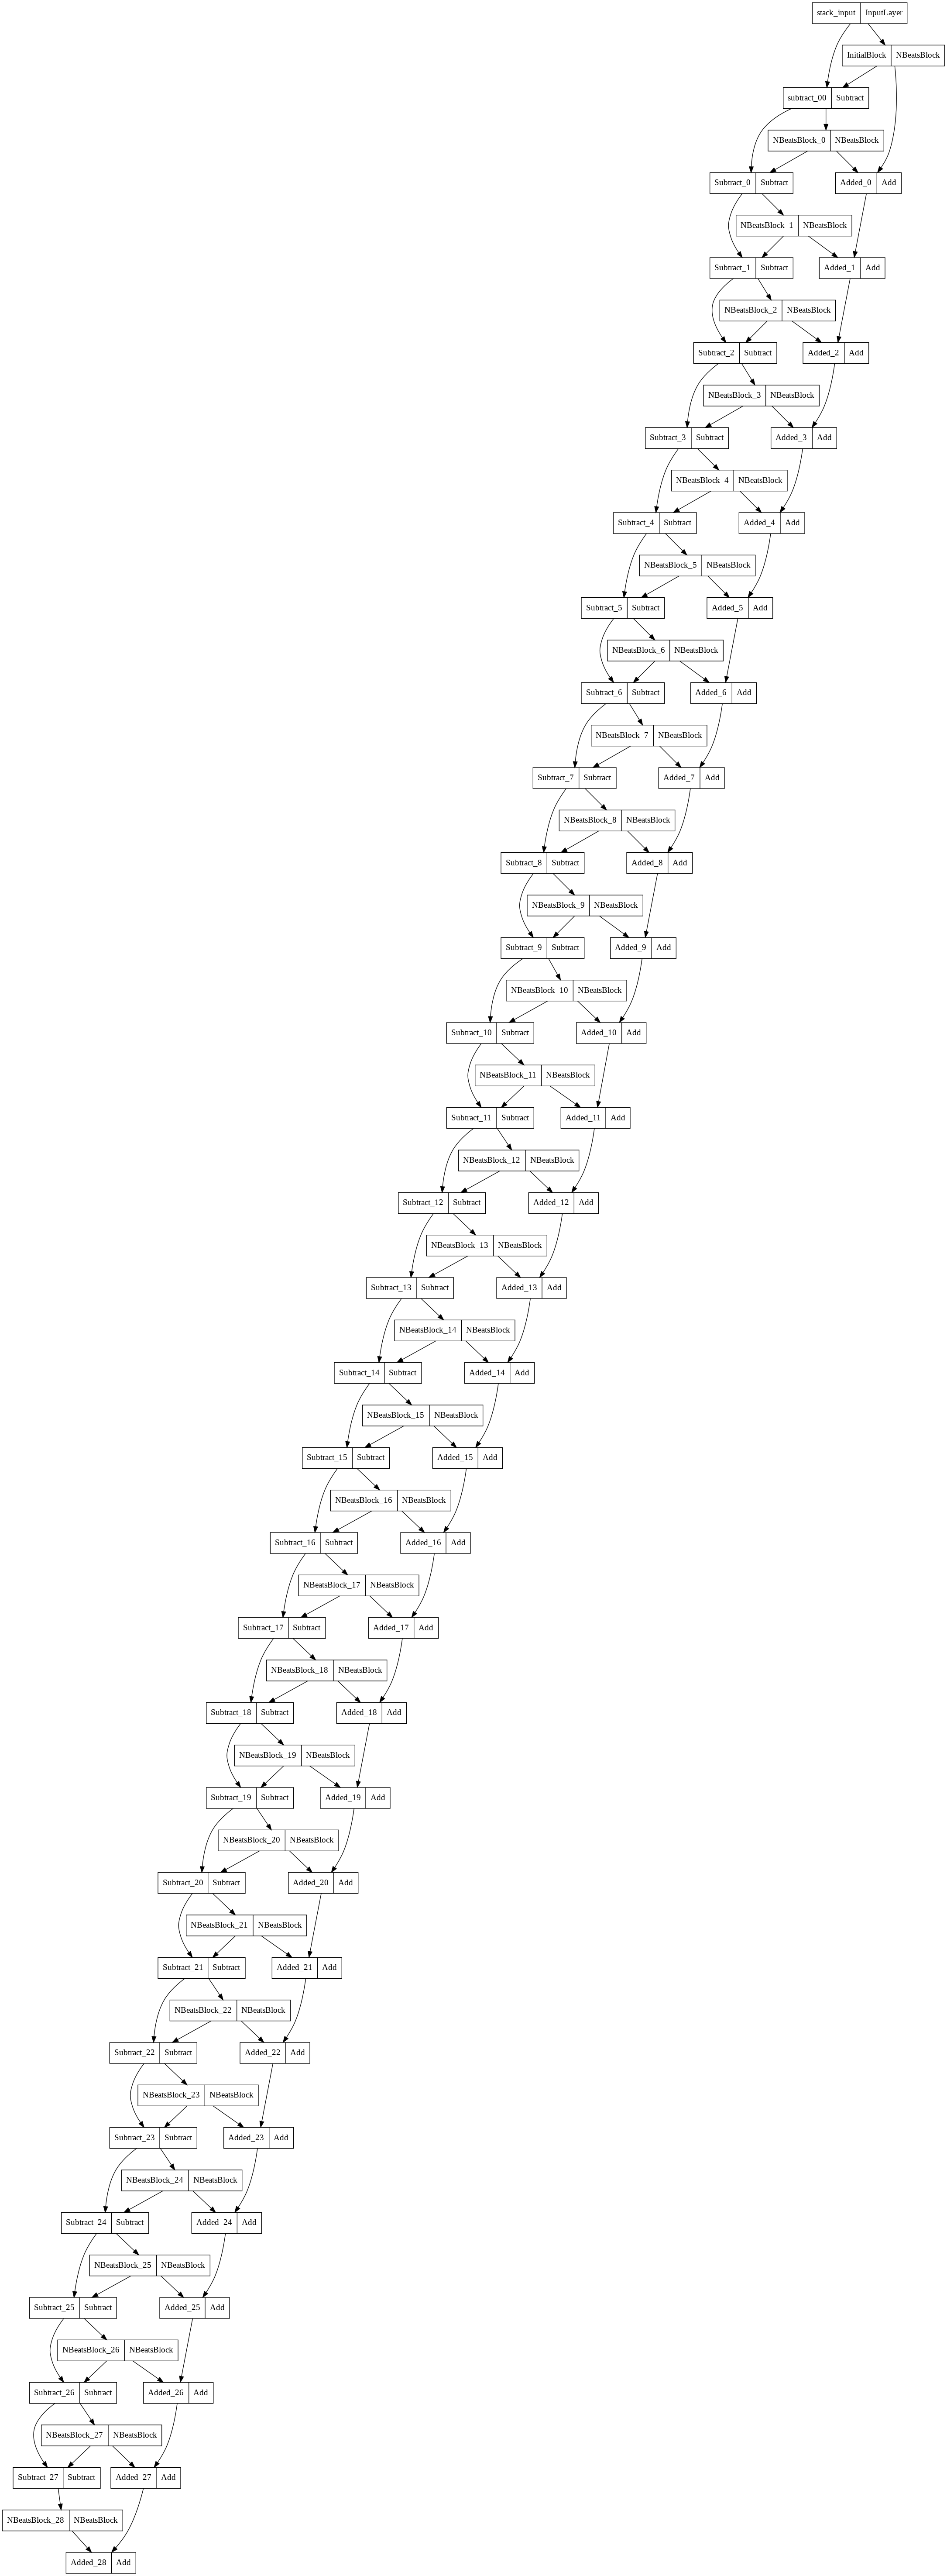

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)